# GUIDE to Worksheet 2.1

This notebook is meant to provide hints and guidance on how to complete Worksheet 2.1: An introduction to bootstrapping.  It will not necessarily answer every part of every problem, but it will get you to the interesting points of the worksheet.

Also, these guides may be useful for you as you are building up your coding toolkit to see different ways to execute different tasks in Python. I am not necessarily showing the most efficient or elegant code, but trying to illustrate different ways to do things.  You should always use the code you feel you can understand best.

---

First, let's take care of our imported modules.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns

sns.set(color_codes=True)

%matplotlib inline

## 1. 

Using `np.random.randn` generate a list of $N=100$  random numbers distributed according to the **standard normal distribution** (mean,$\mu = 0$ and variance, $\sigma^2 = 1$).  Save these numbers as a variable called `realData1`. Calculate the mean using `np.mean` and the 95\% confidence interval using the formula

\begin{equation}
\left[
\mu\pm z_{\alpha/2} \frac{\sigma}{\sqrt{N}}
\right],
\end{equation}

where $\mu$ is the sample mean, $\sigma$ is the sample standard deviation, $N$ is the number of samples, and $z_{p}$ is the $p^{\text{th}}$ percentile of the standard normal distribution (`scipy.stats.norm.ppf`).

In [2]:
np.random.seed(12)  ## Set the seed for reproducibility. The 12 is chosen arbitrarily.

N = 100
realData1 = np.random.randn(N)  ## What is the shape of this? Print it out!

realMean1 = np.mean(realData1)
print(f"The mean of realData1 is {realMean1:.3f}")

realStd1 = np.std(realData1)

alpha = 1 - 0.95
z_alpha = st.norm.ppf(alpha / 2) ## We use alpha / 2 because we want to cut off
                                 ## an equal area from both sides of the normal distribution.

realCI1 = np.array([realMean1 + z_alpha * realStd1 / np.sqrt(N),
                    realMean1 - z_alpha * realStd1 / np.sqrt(N)])

print(f"The confidence interval for this mean is ({realCI1[0]:.3f}, {realCI1[1]:.3f})")

The mean of realData1 is -0.144
The confidence interval for this mean is (-0.349, 0.061)


## 2.

**In a new cell** generate $N_{EXP} = 200$ new sets of $N=100$ normally distributed numbers.  Calculate their means.  Based on your understanding of a confidence interval, how many of these means would you expect to lie in the confidence interval you generated in problem 2?  How many of the means actually lie in your confidence interval?

In [3]:
N_Exp = 200

bigData = np.random.randn(N_Exp, N)  ## What is the shape of this array?

manyMeans = np.mean(bigData, axis=1) ## Check that we get 200 means!

isInCI = (manyMeans >= realCI1[0]) & (manyMeans <= realCI1[1])
fracInCI = np.sum(isInCI) / N_Exp

print(f"{fracInCI:.2%} of the newly simulated means lie in realCI1!")

78.00% of the newly simulated means lie in realCI1!


This is a far cry from 95\%! This is because confidence intervals are a statement concerning the likelihood that the true mean lies in the interval, not the likelihood that future means will fall in a certain range.

## 3.

Using your $N_{EXP}=200$ new sets of $N=100$ normally distributed numbers, calculate $N_{EXP}=200$ confidence intervals.  In how many confidence intervals did your original mean (the mean of `randData1`) lie?

In [4]:
alpha = 0.05
z_alpha = st.norm.ppf([[alpha / 2, 1 - alpha / 2]])  ## We're going to vectorize this process

manyMeans = np.mean(bigData, axis=1, keepdims=True)
manyStds = np.std(bigData, axis=1, keepdims=True)

manyCIs = manyMeans + z_alpha * manyStds / np.sqrt(N)

isInCIs = (manyCIs[:, 0] < realMean1) & (manyCIs[:, 1] > realMean1)
fracInCIs = np.sum(isInCIs) / N_Exp

print(f"{fracInCIs:.2%} of the newly simulated CIs contain realMean1!")

73.50% of the newly simulated CIs contain realMean1!


## 4.

Repeat the above, with $N_{EXP} = 10000$.  Then try $N = 5000$.  What can you deduce about confidence intervals?  (Hint: try [changing the seed](https://towardsdatascience.com/random-seeds-and-reproducibility-933da79446e3) in step 1 and running everything again.)

In [5]:
# np.random.seed(12)  ## Set the seed for reproducibility. The 12 is chosen arbitrarily.

# N = 5000
# realData1 = np.random.randn(N)  ## What is the shape of this? Print it out!

# realMean1 = np.mean(realData1)
# print(f"The mean of realData1 is {realMean1:.3f}")

# realStd1 = np.std(realData1)

# alpha = 1 - 0.95
# z_alpha = st.norm.ppf(alpha / 2) ## We use alpha / 2 because we want to cut off
#                                  ## an equal area from both sides of the normal distribution.

# realCI1 = np.array([realMean1 + z_alpha * realStd1 / np.sqrt(N),
#                     realMean1 - z_alpha * realStd1 / np.sqrt(N)])

# print(f"The confidence interval for this mean is ({realCI1[0]:.3f}, {realCI1[1]:.3f})")

# N_Exp = 10000

# bigData = np.random.randn(N_Exp, N)  ## What is the shape of this array?

# manyMeans = np.mean(bigData, axis=1) ## Check that we get 200 means!

# isInCI = (manyMeans >= realCI1[0]) & (manyMeans <= realCI1[1])
# fracInCI = np.sum(isInCI) / N_Exp

# print(f"{fracInCI:.2%} of the newly simulated means lie in realCI1!")

# alpha = 0.05
# z_alpha = st.norm.ppf([[alpha / 2, 1 - alpha / 2]])  ## We're going to vectorize this process

# manyMeans = np.mean(bigData, axis=1, keepdims=True)
# manyStds = np.std(bigData, axis=1, keepdims=True)

# manyCIs = manyMeans + z_alpha * manyStds / np.sqrt(N)

# isInCIs = (manyCIs[:, 0] < realMean1) & (manyCIs[:, 1] > realMean1)
# fracInCIs = np.sum(isInCIs) / N_Exp

# print(f"{fracInCIs:.2%} of the newly simulated CIs contain realMean1!")

## 5.

The true mean of the underlying distribution is $\mu=0$ because the data *actually come* from a standard normal distribution.  In how many of your confidence intervals does $\mu = 0$ lie?  (Rerun your code a few times to check that your result is "stable".)

In [6]:
muTrue = 0

muInCI1 = (realCI1[0] < muTrue) and (realCI1[1] > muTrue)
print(f"It is {muInCI1} that muTrue = 0 is in realCI1!")

muInCIs = (manyCIs[:, 0] < muTrue) & (manyCIs[:, 1] > muTrue)
fracMuInCIs = np.sum(muInCIs) / N_Exp

print(f"{fracMuInCIs:.2%} of the newly simulated CIs contain muTrue!")

It is True that muTrue = 0 is in realCI1!
93.00% of the newly simulated CIs contain muTrue!


## 6. 

Type `help(np.random.choice)` into a Jupyter cell and read the documentation for this function.  In particular, note the keyword arguments and describe them to yourself.  Try using the function on a few test cases of your own design to see if it works the way you want.

---

Using this documentation, we can see that the method has one positional argument, `a`, and three keyword arguments, `size`, `replace`, and `p`. The key argument for us will be `replace`, which allows us to generate samples from the input array `a` either with or without replacement. (As a reminder, when we use the phrase "replacement" we're thinking about drawing samples like marbles from a bag and we're specifying whether we're putting the marble back into the bag after each draw - whether we're *replacing* the marble or not. *With replacement* means we're putting the marbles back, so that we have the possibility of drawing the same marble multiple times.)

In [7]:
help(np.random.choice)

Help on built-in function choice:

choice(...) method of numpy.random.mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)
    
    Generates a random sample from a given 1-D array
    
    .. versionadded:: 1.7.0
    
    .. note::
        New code should use the `~numpy.random.Generator.choice`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if it were ``np.arange(a)``
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement. Default is True,
        meaning th

## 7. 
Re-sample `randData1` *with replacement* $N_{Boot} = 200$ times.  Calculate the mean of each of these re-samplings.

In [8]:
N_boot = 200

bootData = np.random.choice(realData1, size=(N_boot, N), replace=True)

bootMeans = np.mean(bootData, axis=1)

## 8.

Before writing any more code, write down what you think the *mean* of your bootstrapped means is.

---

I'm going to hazard a guess that the mean is close to zero.

## 9.
Calculate the mean of your bootstrapped means.  How does it compare to the mean of `randData1`?  What does the *distribution* of these resampled means look like?

---

We can see from the figure that my guess was wrong! Instead, it seems that the mean of the bootstraps is close to that of `realData1`, which in hindsight makes sense since our resampling comes from `realData1`! We can see that this distribution is roughly unimodal and symmetric about this mean.

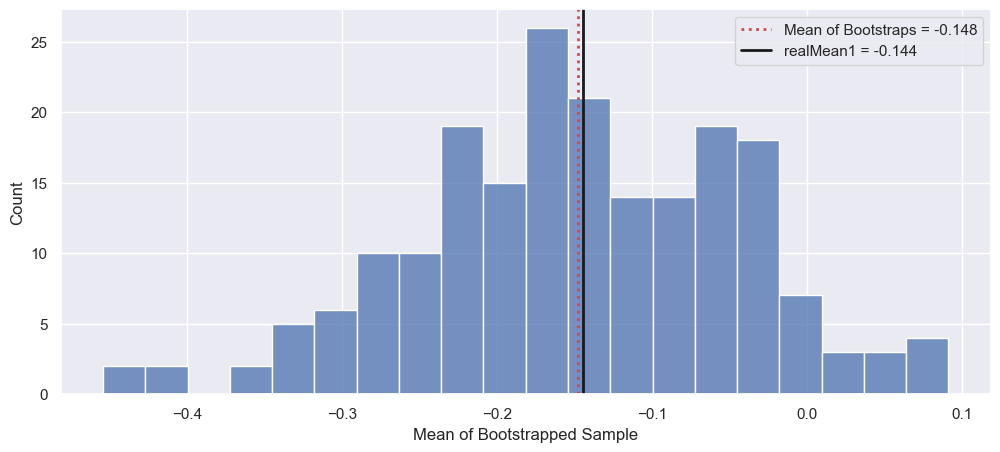

In [9]:
allBootMean = np.mean(bootMeans)

fig, ax = plt.subplots(1, 1, figsize=(12, 5))

_ = sns.histplot(bootMeans, bins=20)

_ = ax.axvline(allBootMean, color='r', linestyle=':', lw=2,
               label=f"Mean of Bootstraps = {allBootMean:.3f}")

_ = ax.axvline(realMean1, color='k', lw=2,
               label=f"realMean1 = {realMean1:.3f}")

_ = ax.legend()
_ = ax.set_xlabel("Mean of Bootstrapped Sample")

## 10.
Consider your array of $N_{Exp} = 200$ means generated from independent "experiments".  How does the distribution of these means compare to the distribution of resampled means?

---

Now we can see that the simulated means are distributed around the true mean of zero, but the bootstrapped means are offset to be around the mean of the first simulation, `realData1`.  However, the shape of these distributions are similar! In particular, they appear to have similar widths.

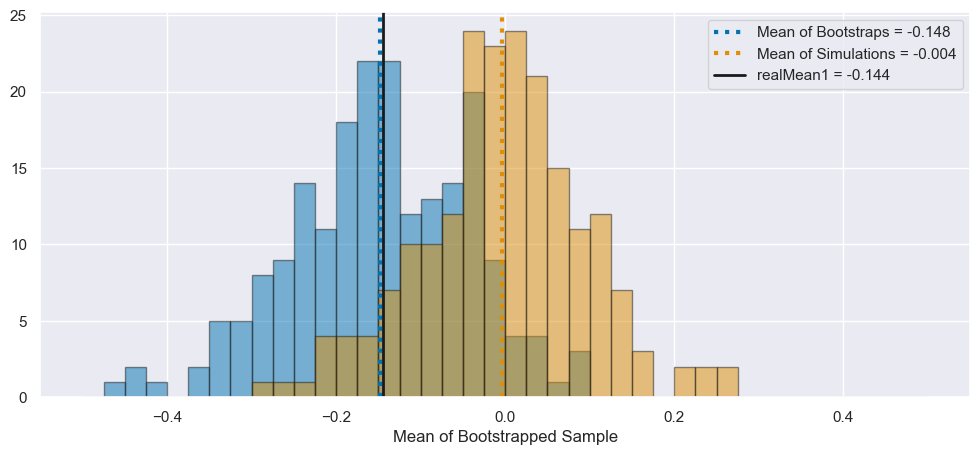

In [10]:
allBootMean = np.mean(bootMeans)

cblind = sns.color_palette('colorblind')

fig, ax = plt.subplots(1, 1, figsize=(12, 5))

bins = np.linspace(-0.5, 0.5, 41)

_ = plt.hist(bootMeans, bins=bins, color=cblind[0], alpha=0.5, edgecolor='k')
_ = plt.hist(manyMeans, bins=bins, color=cblind[1], alpha=0.5, edgecolor='k')

_ = ax.axvline(allBootMean, color=cblind[0], linestyle=':', lw=3,
               label=f"Mean of Bootstraps = {allBootMean:.3f}")

_ = ax.axvline(np.mean(manyMeans), color=cblind[1], linestyle=':', lw=3,
               label=f"Mean of Simulations = {np.mean(manyMeans):.3f}")

_ = ax.axvline(realMean1, color='k', lw=2,
               label=f"realMean1 = {realMean1:.3f}")

_ = ax.legend()
_ = ax.set_xlabel("Mean of Bootstrapped Sample")

## 11.
Calculate the $2.5^{\text{th}}$ and $97.5^{\text{th}}$ percentiles of the resampled means.  How do they compare to the confidence interval generated in Problem 1?

In [11]:
bootCI = np.percentile(bootMeans, [2.5, 97.5])

print(f"The 95% interval for the bootstrapped means is ({bootCI[0]:.3f}, {bootCI[1]:.3f})")

print(f"The confidence interval for this mean is ({realCI1[0]:.3f}, {realCI1[1]:.3f})")

The 95% interval for the bootstrapped means is (-0.351, 0.041)
The confidence interval for this mean is (-0.349, 0.061)


## 12.
Increase the number of both resamplings and experiments to 10,000 ($N_{EXP}$ and $N_{Boot}$).  How do the distributions of means change?  How does the mean of the resampled means compare to the mean of `randData1`?  How do the percentiles of the resampled means compare to the confidence interval of `randData1`?  How many experiments yield confidence intervals that contain `randData1`'s mean and/or 0?  (If you have not hardcoded $N_{Exp} = 200$ and $N_{BOOT} = 200$, this will be easy to re-run!)

73.25% of the newly simulated means lie in realCI1!
69.13% of the newly simulated CIs contain realMean1!
The 95% interval for the bootstrapped means is (-0.353, 0.063)
The original confidence interval for this mean is (-0.349, 0.061)


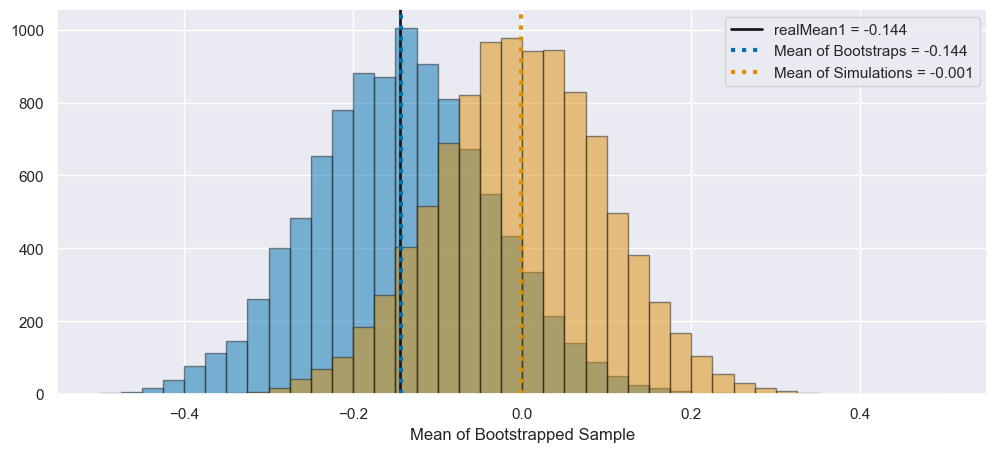

In [12]:
N_Exp = 10000
N_boot = 10000

### Generate simulated data
bigData = np.random.randn(N_Exp, N)  ## What is the shape of this array?

manyMeans = np.mean(bigData, axis=1)

isInCI = (manyMeans >= realCI1[0]) & (manyMeans <= realCI1[1])
fracInCI = np.sum(isInCI) / N_Exp

print(f"{fracInCI:.2%} of the newly simulated means lie in realCI1!")

alpha = 0.05
z_alpha = st.norm.ppf([[alpha / 2, 1 - alpha / 2]])  ## We're going to vectorize this process

manyMeans = np.mean(bigData, axis=1, keepdims=True)
manyStds = np.std(bigData, axis=1, keepdims=True)

manyCIs = manyMeans + z_alpha * manyStds / np.sqrt(N)

isInCIs = (manyCIs[:, 0] < realMean1) & (manyCIs[:, 1] > realMean1)
fracInCIs = np.sum(isInCIs) / N_Exp

print(f"{fracInCIs:.2%} of the newly simulated CIs contain realMean1!")

### Generate bootstrapped data
bootData = np.random.choice(realData1, size=(N_boot, N), replace=True)

bootMeans = np.mean(bootData, axis=1)

bootCI = np.percentile(bootMeans, [2.5, 97.5])

print(f"The 95% interval for the bootstrapped means is ({bootCI[0]:.3f}, {bootCI[1]:.3f})")

print(f"The original confidence interval for this mean is ({realCI1[0]:.3f}, {realCI1[1]:.3f})")

allBootMean = np.mean(bootMeans)

### Let's plot
cblind = sns.color_palette('colorblind')

fig, ax = plt.subplots(1, 1, figsize=(12, 5))

bins = np.linspace(-0.5, 0.5, 41)

_ = plt.hist(bootMeans, bins=bins, color=cblind[0], alpha=0.5, edgecolor='k')
_ = plt.hist(manyMeans, bins=bins, color=cblind[1], alpha=0.5, edgecolor='k')

_ = ax.axvline(realMean1, color='k', lw=2,
               label=f"realMean1 = {realMean1:.3f}")

_ = ax.axvline(allBootMean, color=cblind[0], linestyle=':', lw=3,
               label=f"Mean of Bootstraps = {allBootMean:.3f}")

_ = ax.axvline(np.mean(manyMeans), color=cblind[1], linestyle=':', lw=3,
               label=f"Mean of Simulations = {np.mean(manyMeans):.3f}")


_ = ax.legend()
_ = ax.set_xlabel("Mean of Bootstrapped Sample")